# Pandas 


In [ ]:
Pandas operates with three basic data structures: Series, DataFrame, and Panel. 

**Import pandas as pd.**

In [2]:
import pandas as pd

**Read games.csv as a dataframe called games.**

In [3]:
games = pd.read_csv('games.csv')

**Check the head of the DataFrame.**

In [4]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


**Use .info() method to find out total number of entries in dataset**

In [18]:
games.info() # 81312 Entries in total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

**What is the mean playing time for all games put together ?**

In [5]:
games['playingtime'].mean()

51.63478827682052

**What is the highest number of comments received for a game?**

In [6]:
games['total_comments'].max()

11798

**What is the name of the game with id 1500?**

In [7]:
games[games['id']==1500]['name']

10592    Zocken
Name: name, dtype: object

**And which year was it published?**

In [8]:
games[games['id']==1500]['yearpublished']

10592    1999.0
Name: yearpublished, dtype: float64

**Which game has received highest number of comments?**

In [9]:
games[games['total_comments']== games['total_comments'].max()]['name']

165     Catan
1965    Catan
Name: name, dtype: object

**Which games have received least number of comments?**

In [12]:
games[games['total_comments']== games['total_comments'].min()]['name']

13048                                           Looney Leo
13054                                                 Dump
13068                                        Field of Fire
13095                                             Matheeno
13103    Auction America: The Trivia Game for Any Colle...
                               ...                        
81307                                 Micro Rome: Aegyptus
81308    Trivial Pursuit: Marvel Cinematic Universe  Da...
81309                                            BEARanoia
81310                                              Freight
81311                                    Bingo Animal Kids
Name: name, Length: 29001, dtype: object

**What was the average minage of all games per game "type"? (boardgame & boardgameexpansion)**

In [13]:
games.groupby('type').mean()['minage']

type
boardgame             6.724798
boardgameexpansion    8.733321
Name: minage, dtype: float64

**How many unique games are there in the dataset?**

In [14]:
games['id'].nunique()  
# Note - Business sense dictates us to look at unique ID values rather than names which might have clerical errors!



79463

**How many boardgames and boardgameexpansions are there in the dataset?**

In [27]:
games['type'].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

**Is there a correlation between playing time and total comments for the games? - Use the .corr() function**

In [28]:
games[['playingtime','total_comments']].corr() # No correlation.

,playingtime,total_comments
playingtime,1.000000,0.020645
total_comments,0.020645,1.000000


## Data Visualization using Seaborn

### Import the seaborn library and set color codes as true

In [15]:
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt

### Drop na values for negating issues during visualization

In [16]:
games.dropna(inplace=True)

### View the distance plot for minage

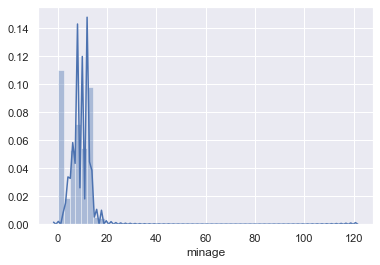

In [17]:
sns.distplot(games['minage'])

### Is there a linear relationship between Minage & average_rating?

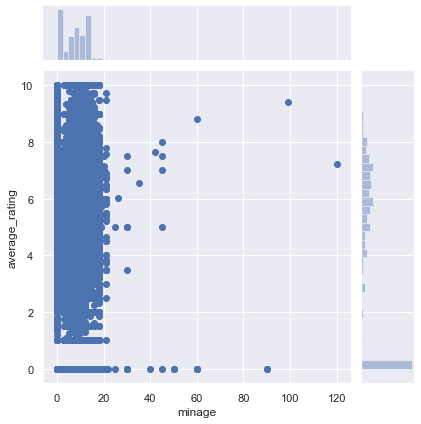

In [18]:
sns.jointplot(games['minage'],games['average_rating'])

### Compare the relationship between playingtime , minage and average rating using pairplot

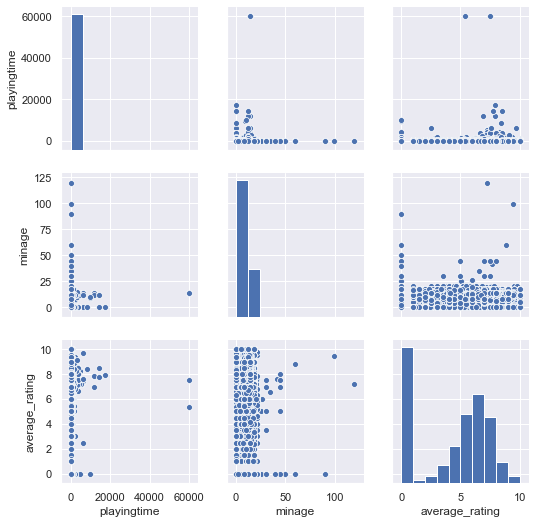

In [15]:
sns.pairplot(games[['playingtime','minage','average_rating']])
plt.show()

### Compare type of game and playingtime using a stripplot

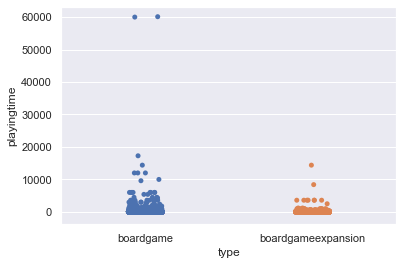

In [16]:
sns.stripplot(games['type'],games['playingtime'],jitter=True)

### Analyze the linear trend between playing time(less than 500 mins) and average_rating received for the same

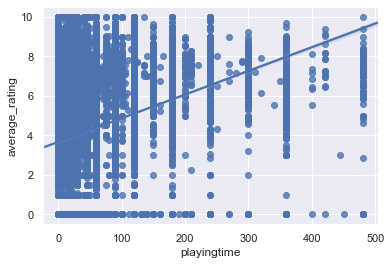

In [17]:
sns.regplot(x='playingtime',y='average_rating',data=games[games['playingtime']<500])